## Aesthetics

Aesthetic mappings are the cornerstone of the grammar of graphics plotting concept. This is where the magic happens - converting continuous and categorical data into visual scales that provide access to a large amount of information in a very short time. In this chapter you’ll understand how to choose the best aesthetic mappings for your data.

### All about aesthetics: color, shape and size
In the video you saw 9 visible aesthetics. Let's apply them to a categorical variable — the cylinders in mtcars, cyl.

These are the aesthetics you can consider within aes() in this chapter: x, y, color, fill, size, alpha, labels and shape.

One common convention is that you don't name the x and y arguments to aes(), since they almost always come first, but you do name other arguments.


In the following exercise the fcyl column is categorical. It is cyl transformed into a factor.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


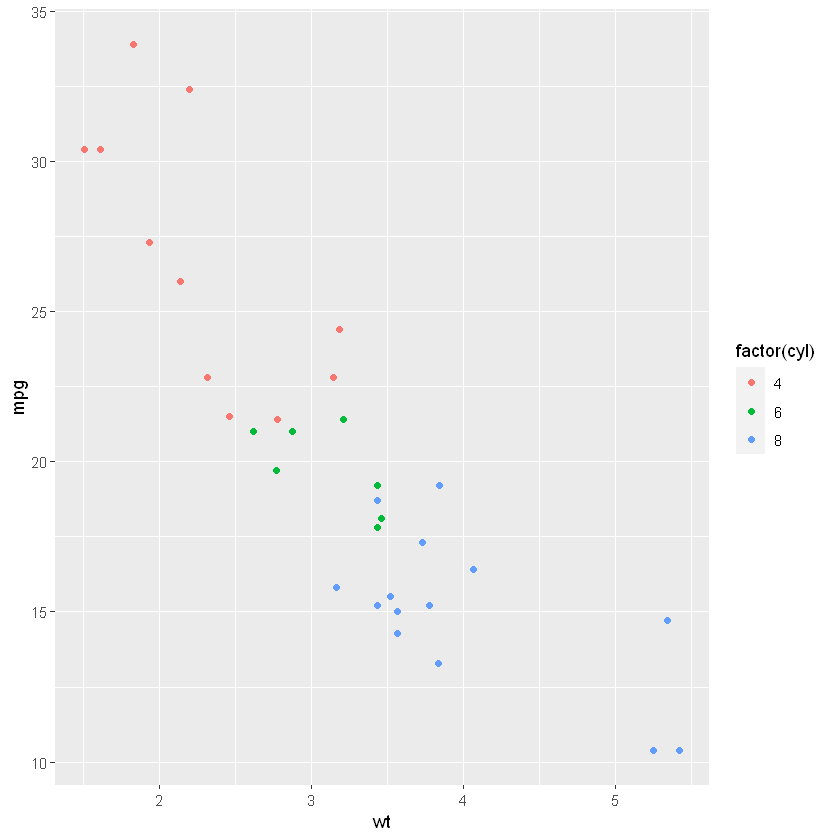

In [2]:
library(ggplot2)
# Map x to wt, y to mpg and color to fcyl
str(mtcars)

ggplot(mtcars, aes(wt, mpg, color = factor(cyl))) +geom_point()

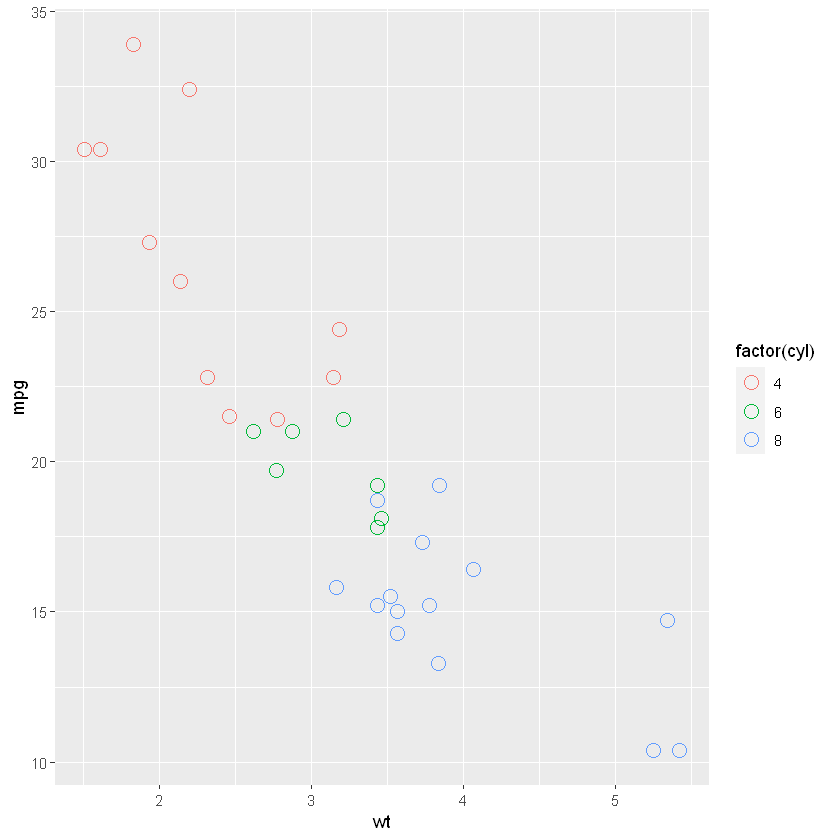

In [3]:
ggplot(mtcars, aes(wt, mpg, color = factor(cyl))) +
  # Set the shape and size of the points
  geom_point(shape = 1, size = 4)

### All about aesthetics: color vs. fill
Typically, the color aesthetic changes the outline of a geom and the fill aesthetic changes the inside. geom_point() is an exception: you use color (not fill) for the point color. However, some shapes have special behavior.

The default geom_point() uses shape = 19: a solid circle. An alternative is shape = 21: a circle that allow you to use both fill for the inside and color for the outline. This is lets you to map two aesthetics to each point.

All shape values are described on the points() help page.

fcyl and fam are the cyl and am columns converted to factors, respectively.

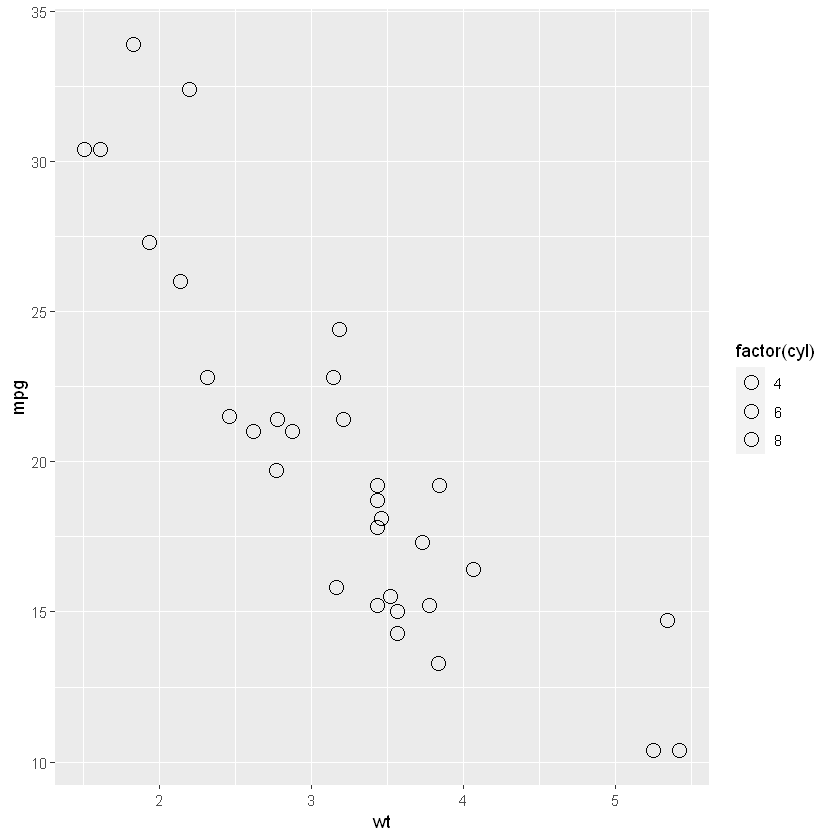

In [4]:
# Map fcyl to fill
ggplot(mtcars, aes(wt, mpg, fill = factor(cyl))) +
  geom_point(shape = 1, size = 4)

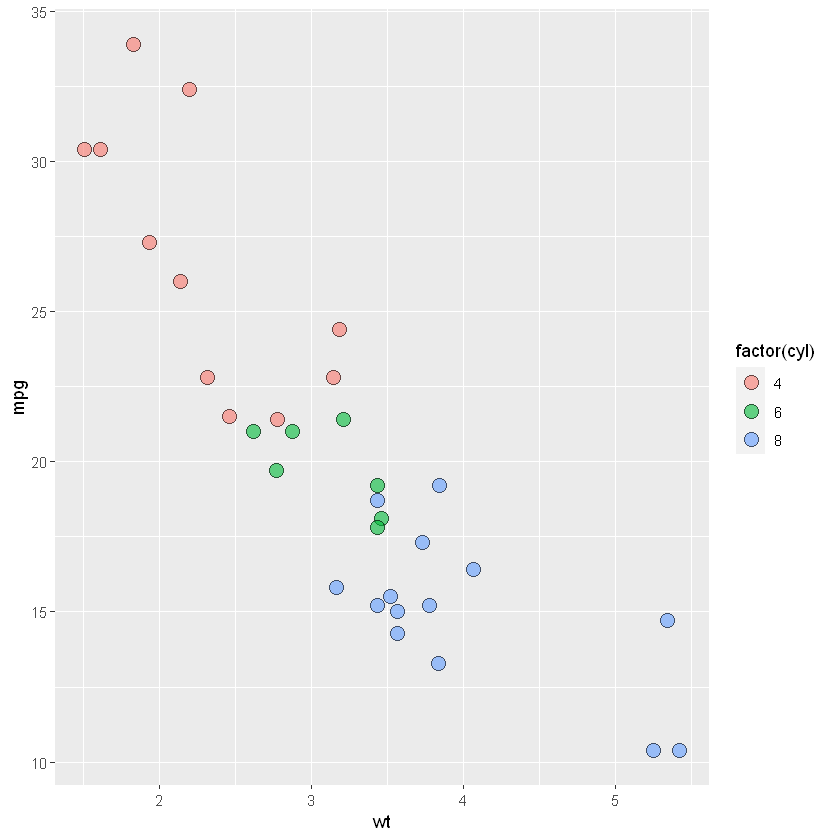

In [11]:
ggplot(mtcars, aes(wt, mpg, fill = factor(cyl))) +
  # Change point shape; set alpha
  geom_point(shape = 21, size = 4, alpha = 0.6)

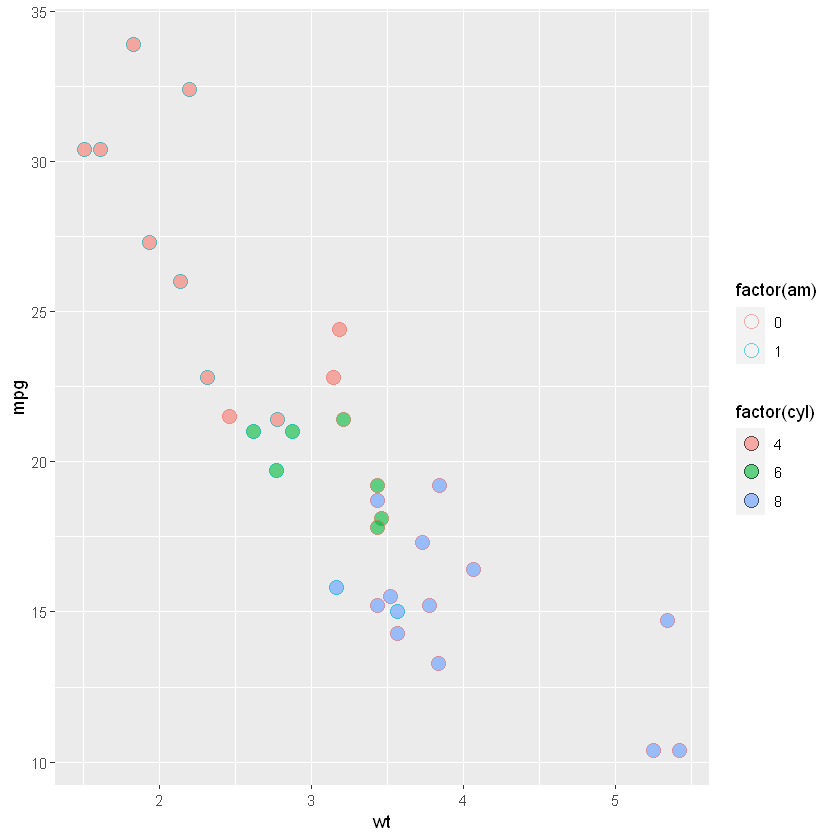

In [5]:
# Map color to fam
ggplot(mtcars, aes(wt, mpg, fill = factor(cyl), color = factor(am))) +
  geom_point(shape = 21, size = 4, alpha = 0.6)

Notice that mapping a categorical variable onto fill doesn't change the colors, although a legend is generated! This is because the default shape for points only has a color attribute and not a fill attribute! Use fill when you have another shape (such as a bar), or when using a point that does have a fill and a color attribute, such as shape = 21, which is a circle with an outline. Any time you use a solid color, make sure to use alpha blending to account for over plotting.

### All about aesthetics: comparing aesthetics
Now that you've got some practice with using attributes, be careful of a major pitfall: these attributes can overwrite the aesthetics of your plot!

Warning message:
"Using size for a discrete variable is not advised."

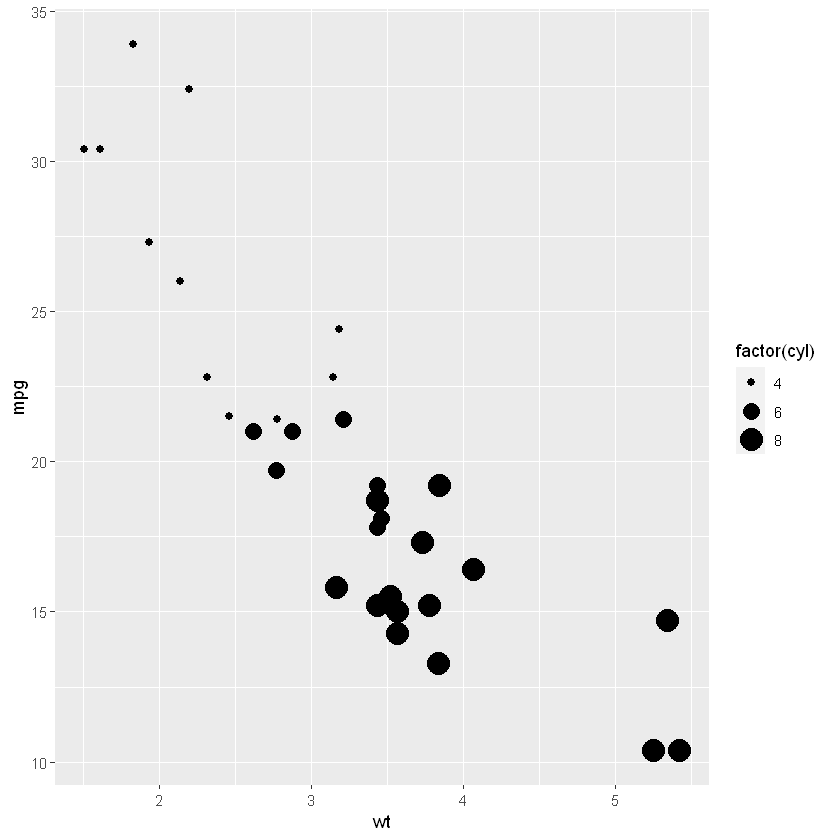

In [6]:
# Base layer
plt_mpg_vs_wt <- ggplot(mtcars, aes(wt, mpg))

# Map fcyl to alpha, not size
plt_mpg_vs_wt +
  geom_point(aes(size = factor(cyl)))

Warning message:
"Using alpha for a discrete variable is not advised."

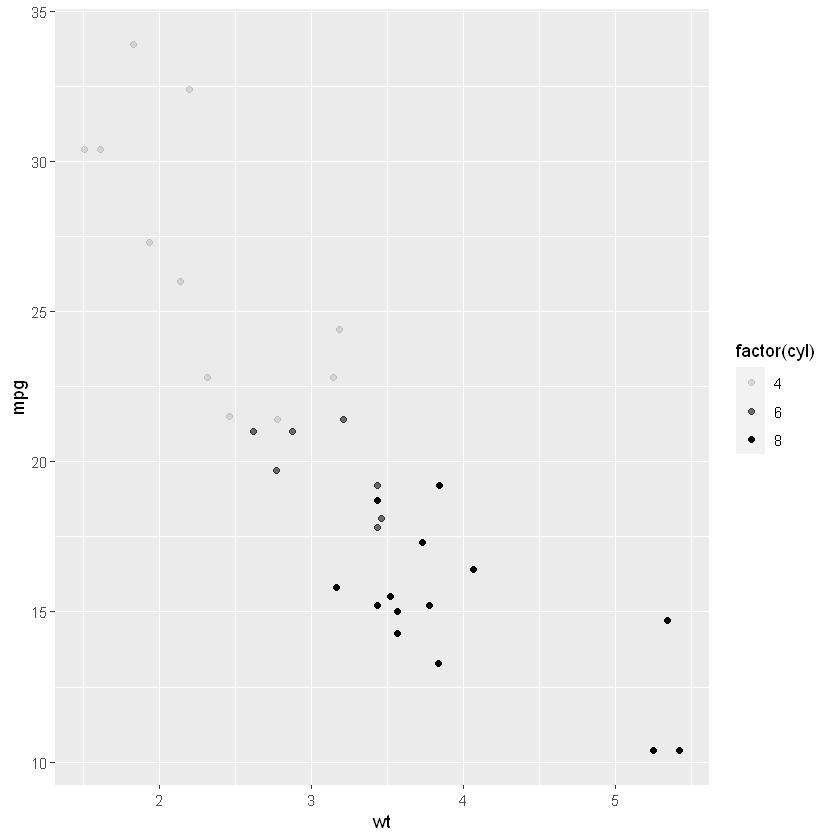

In [15]:
# Base layer
plt_mpg_vs_wt <- ggplot(mtcars, aes(wt, mpg))

# Map fcyl to alpha, not size
plt_mpg_vs_wt +
  geom_point(aes(alpha = factor(cyl)))

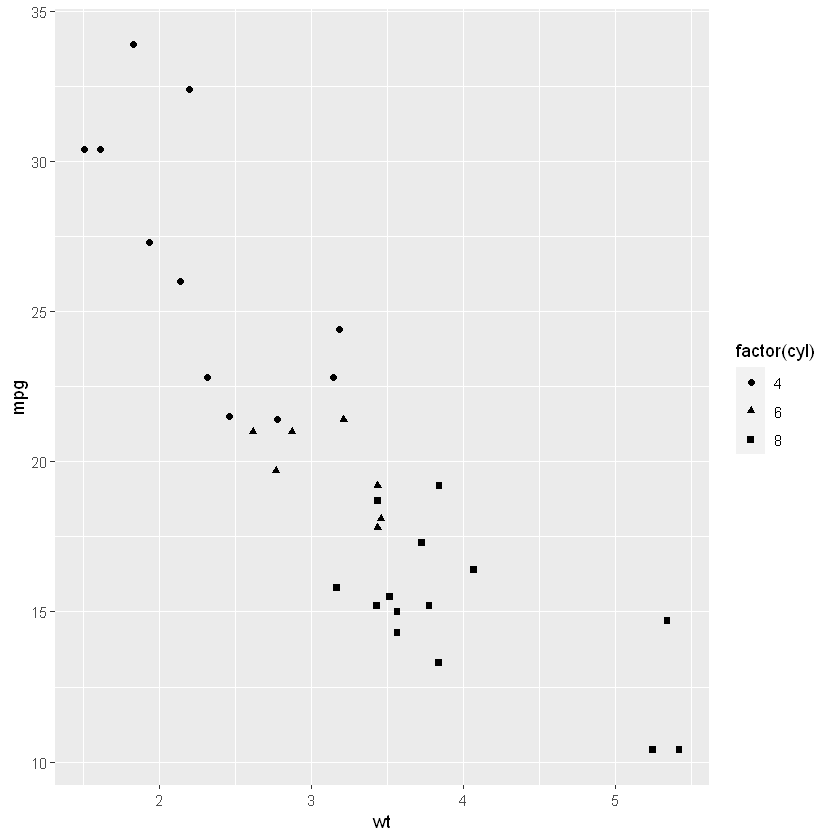

In [17]:
# Map fcyl to shape, not alpha
plt_mpg_vs_wt +
  geom_point(aes(shape = factor(cyl)))

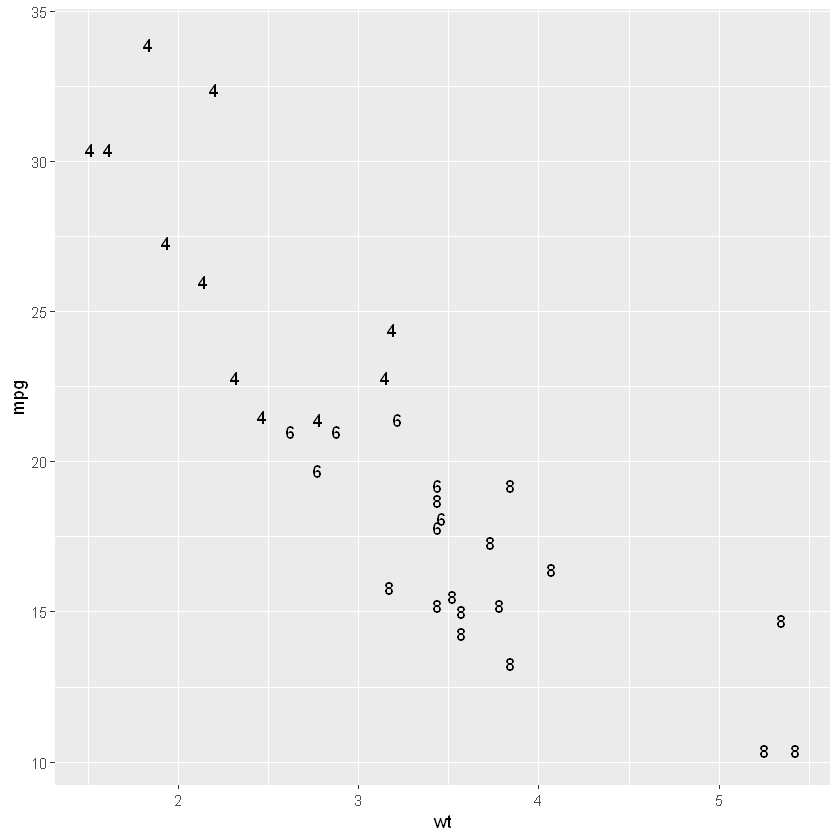

In [18]:
# Use text layer and map fcyl to label
plt_mpg_vs_wt +
  geom_text(aes(label = factor(cyl)))

### All about attributes: color, shape, size and alpha
This time you'll use these arguments to set attributes of the plot, not map variables onto aesthetics.

You can specify colors in R using hex codes: a hash followed by two hexadecimal numbers each for red, green, and blue ("#RRGGBB"). Hexadecimal is base-16 counting. You have 0 to 9, and A representing 10 up to F representing 15. Pairs of hexadecimal numbers give you a range from 0 to 255. "#000000" is "black" (no color), "#FFFFFF" means "white", and `"#00FFFF" is cyan (mixed green and blue).

A hexadecimal color variable, my_blue has been defined for you.

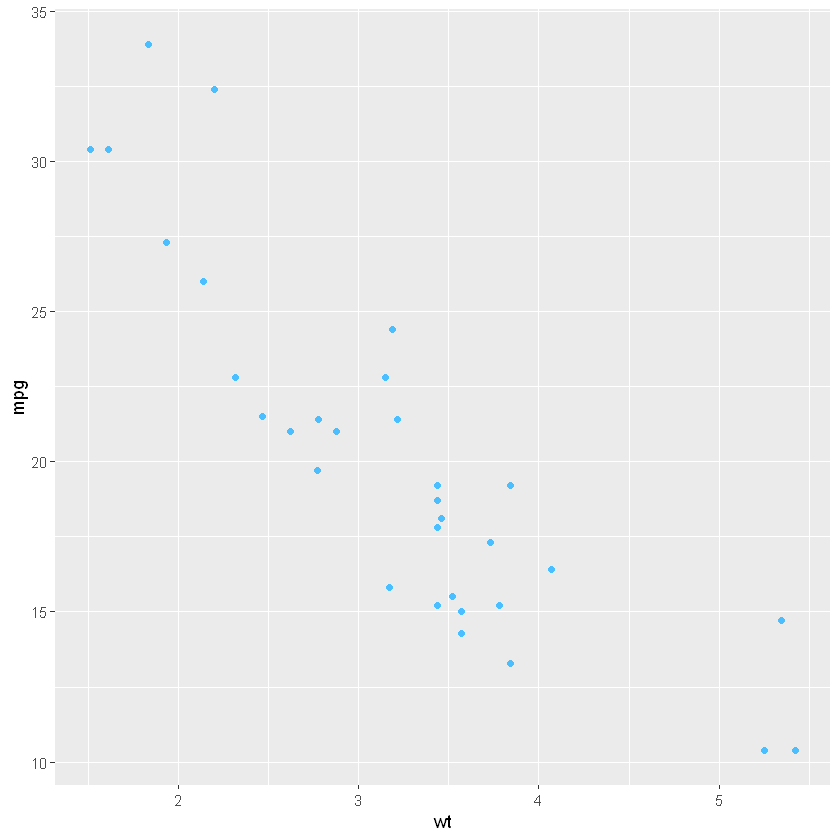

In [7]:
# A hexadecimal color
my_blue <- "#4ABEFF"

ggplot(mtcars, aes(wt, mpg)) +
  # Set the point color and alpha
  geom_point(color = my_blue)

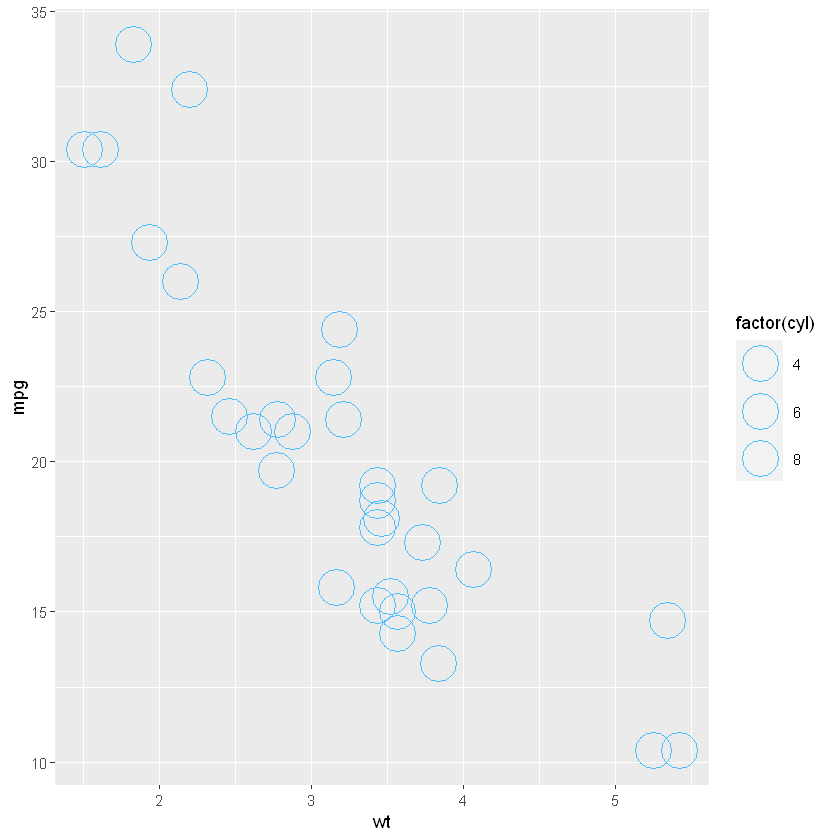

In [9]:
# A hexadecimal color
my_blue <- "#4ABEFF"

# Change the color mapping to a fill mapping
ggplot(mtcars, aes(wt, mpg, fill = factor(cyl))) +
  # Set point size and shape
geom_point(color = my_blue, size = 10, shape = 1)  

### All about attributes: conflicts with aesthetics
In the videos you saw that you can use all the aesthetics as attributes. Let's see how this works with the aesthetics you used in the previous exercises: x, y, color, fill, size, alpha, label and shape.

In this exercise you will set all kinds of attributes of the points!

You will continue to work with mtcars.

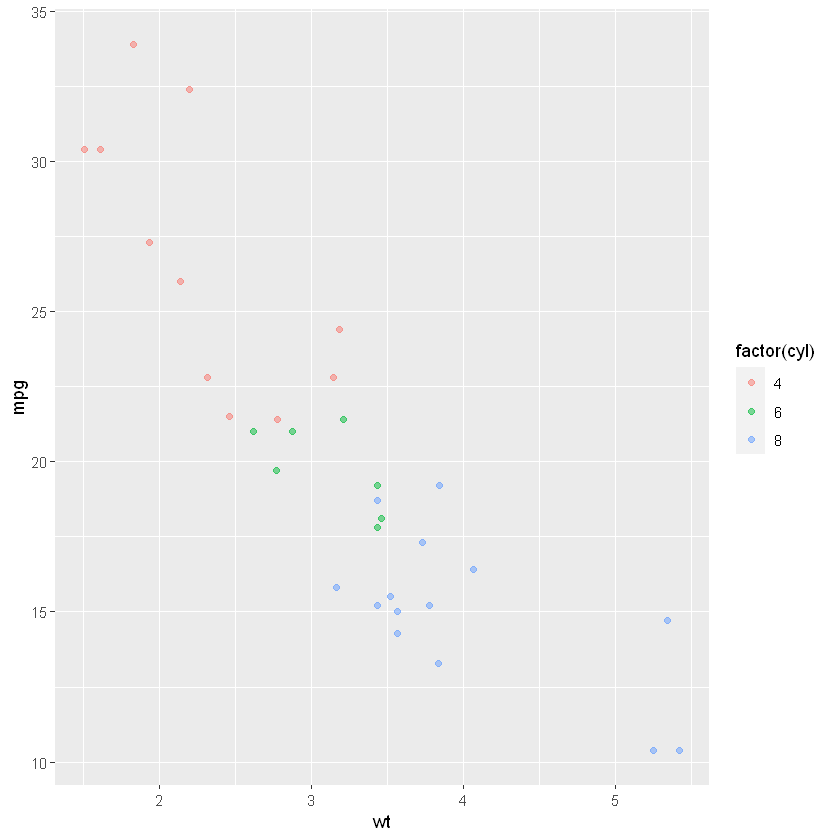

In [10]:
ggplot(mtcars, aes(wt, mpg, color = factor(cyl))) +
  # Add point layer with alpha 0.5
  geom_point(alpha = 0.5)

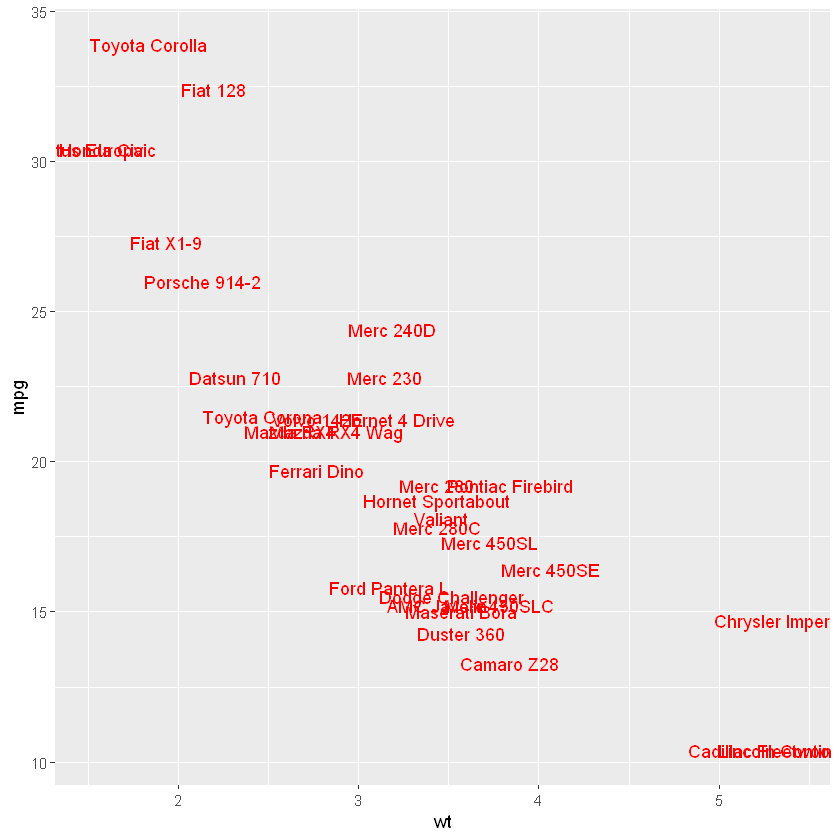

In [11]:
ggplot(mtcars, aes(wt, mpg, color = fcyl)) +
  # Add text layer with label rownames(mtcars) and color red
 geom_text(label = rownames(mtcars), color = "red")

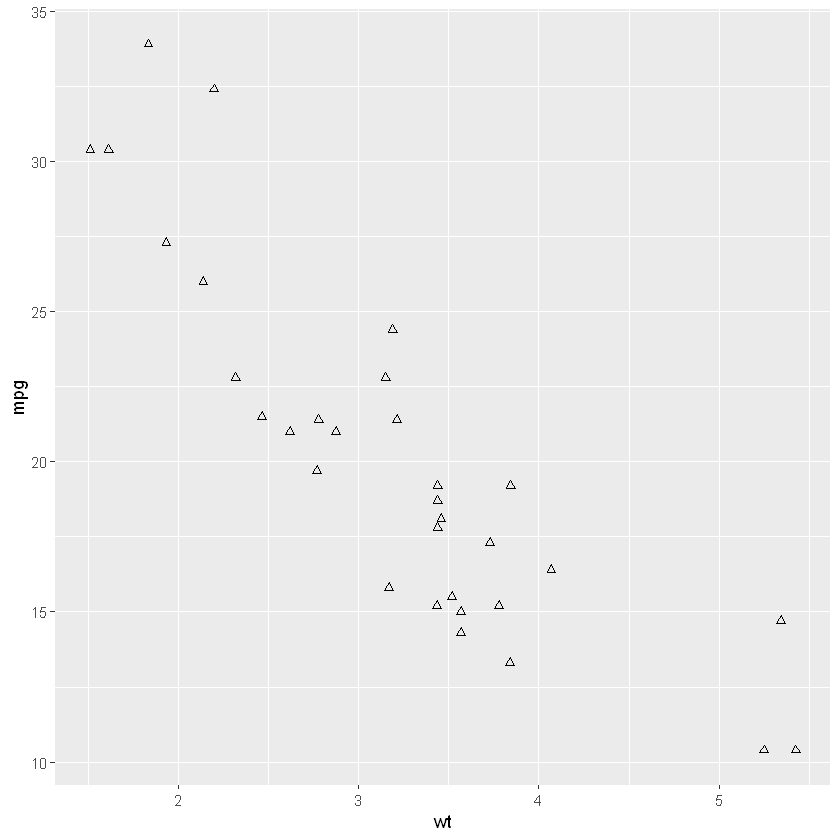

In [13]:
ggplot(mtcars, aes(wt, mpg, color = fcyl)) +
  # Add points layer with shape 24 and color yellow
 geom_point(shape = 24, color = "black")

### Going all out
In this exercise, you will gradually add more aesthetics layers to the plot. You're still working with the mtcars dataset, but this time you're using more features of the cars. Each of the columns is described on the mtcars help page. Columns fcyl and fam have been added (as before) as categorical versions of cyl and am respectively.

Notice that adding more aesthetic mappings to your plot is not always a good idea! You may just increase complexity and decrease readability.

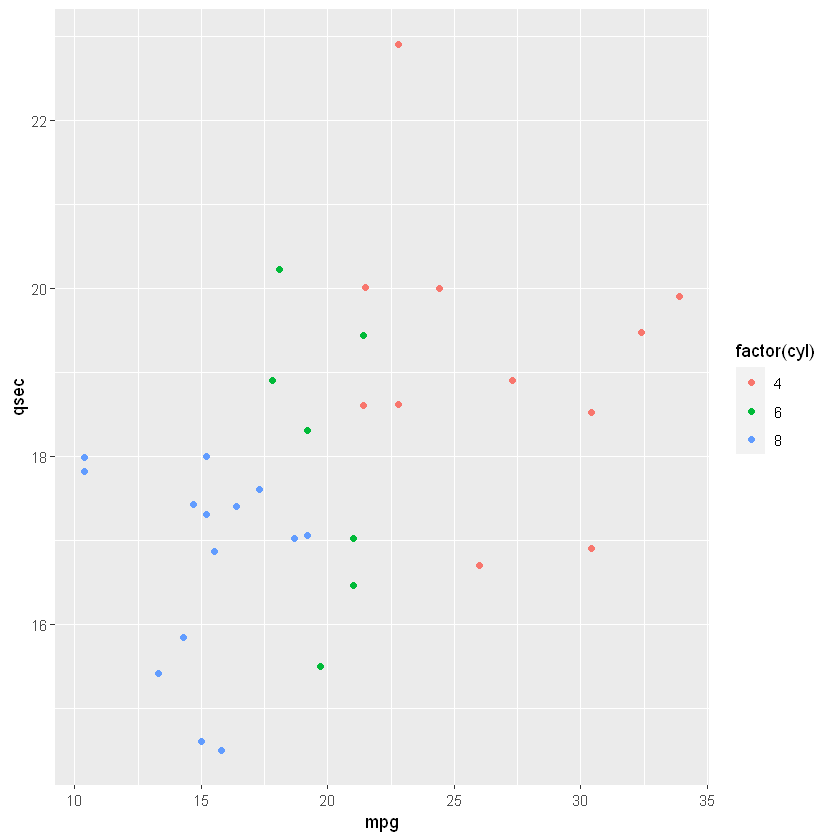

In [15]:
# 3 aesthetics: qsec vs. mpg, colored by fcyl
ggplot(mtcars, aes(mpg,qsec, color = factor(cyl))) + geom_point()

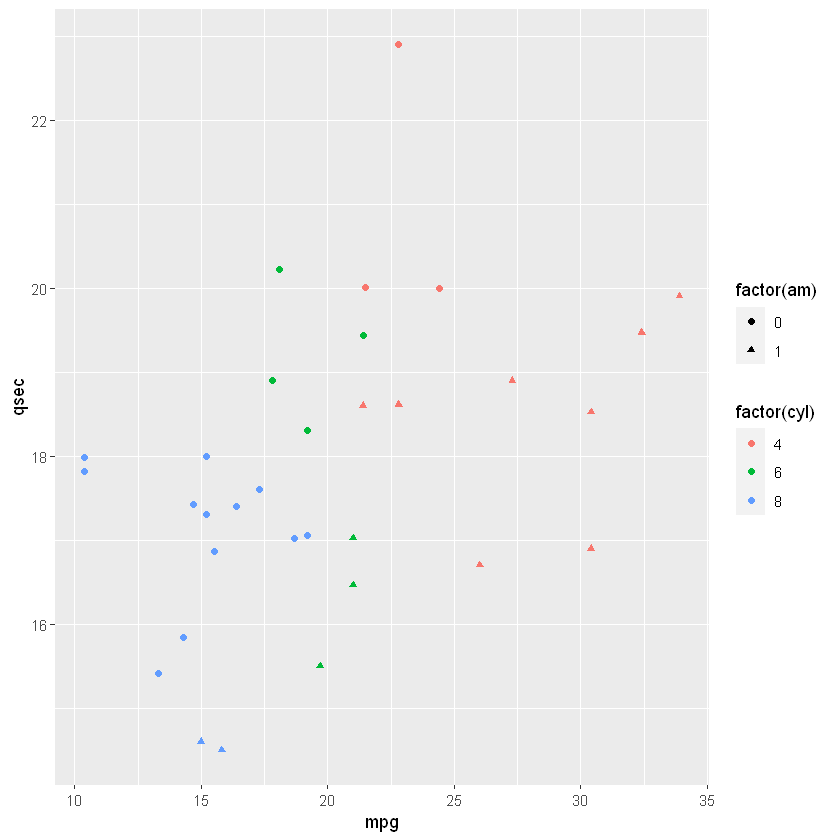

In [21]:
# 4 aesthetics: add a mapping of shape to fam
ggplot(mtcars, aes(mpg, qsec, color = factor(cyl), shape = factor(am))) +
  geom_point()

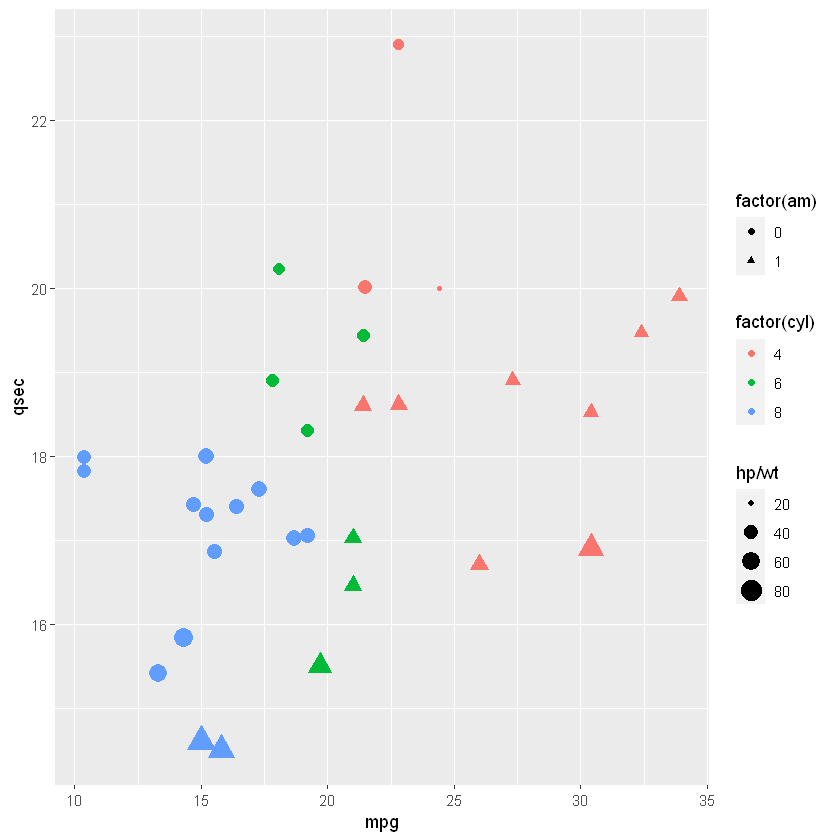

In [22]:
# 5 aesthetics: add a mapping of size to hp / wt
ggplot(mtcars, aes(mpg, qsec, color = factor(cyl), shape = factor(am), size = hp/wt)) +
  geom_point()

### Updating aesthetic labels
In this exercise, you'll modify some aesthetics to make a bar plot of the number of cylinders for cars with different types of transmission.

You'll also make use of some functions for improving the appearance of the plot.

labs() to set the x- and y-axis labels. It takes strings for each argument.

scale_color_manual() defines properties of the color scale (i.e. axis). The first argument sets the legend title. values is a named vector of colors to use.

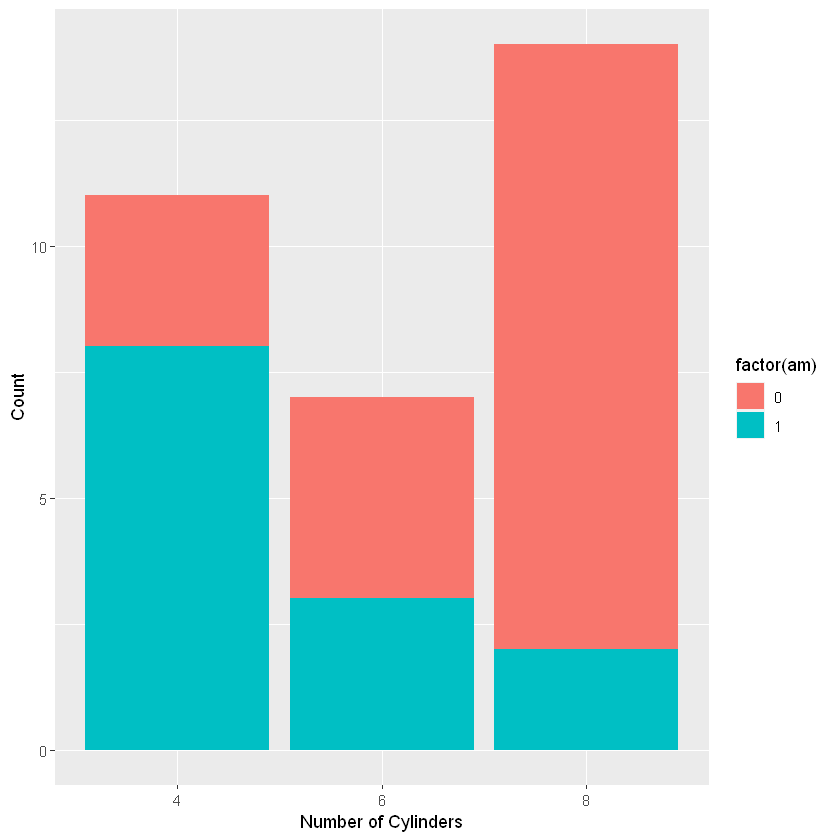

In [25]:
ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  geom_bar() +
  # Set the axis labels
  labs(x = "Number of Cylinders", y = "Count")

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: Transmission
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: manual
    train: function
    t

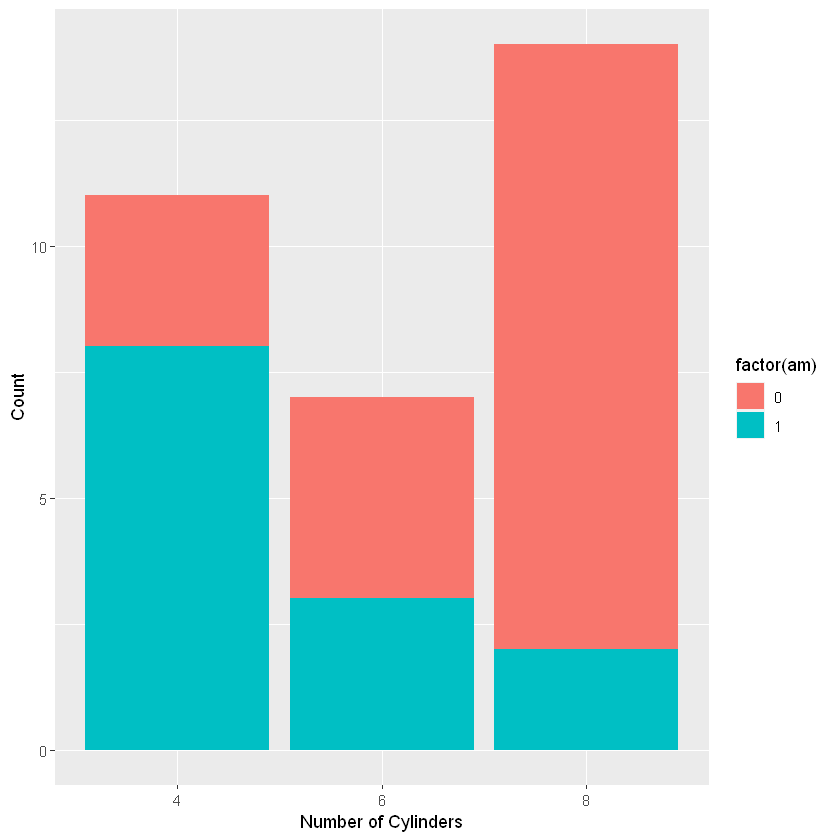

In [35]:
palette <- c(automatic = "#377EB8", manual = "#E41A1C")

# Set the position
ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  geom_bar() +
  labs(x = "Number of Cylinders", y = "Count")
  scale_fill_manual("Transmission", values = palette)

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: Transmission
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: manual
    train: function
    t

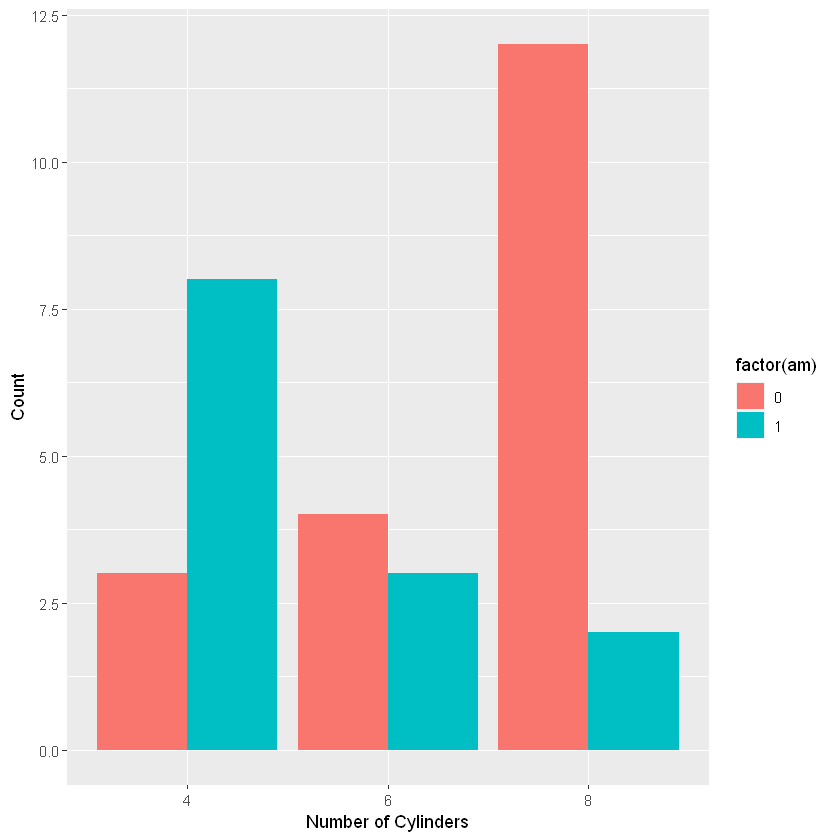

In [36]:
palette <- c(automatic = "#377EB8", manual = "#E41A1C")

# Set the position
ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  geom_bar(position = "dodge") +
  labs(x = "Number of Cylinders", y = "Count")
  scale_fill_manual("Transmission", values = palette)

### Setting a dummy aesthetic
In the last chapter you saw that all the visible aesthetics can serve as attributes and aesthetics, but I very conveniently left out x and y. That's because although you can make univariate plots (such as histograms, which you'll get to in the next chapter), a y-axis will always be provided, even if you didn't ask for it.

You can make univariate plots in ggplot2, but you will need to add a fake y axis by mapping y to zero.

When using setting y-axis limits, you can specify the limits as separate arguments, or as a single numeric vector. That is, ylim(lo, hi) or ylim(c(lo, hi)).

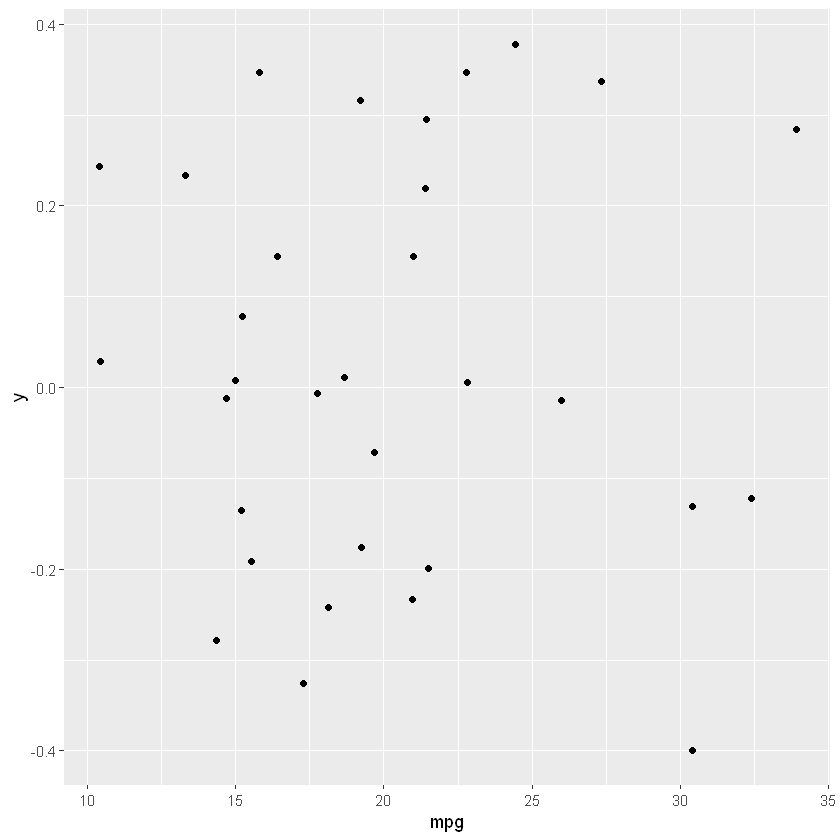

In [37]:
# Plot 0 vs. mpg
ggplot(mtcars, aes(mpg, 0))+
  # Add jitter 
  geom_point(position = "jitter")

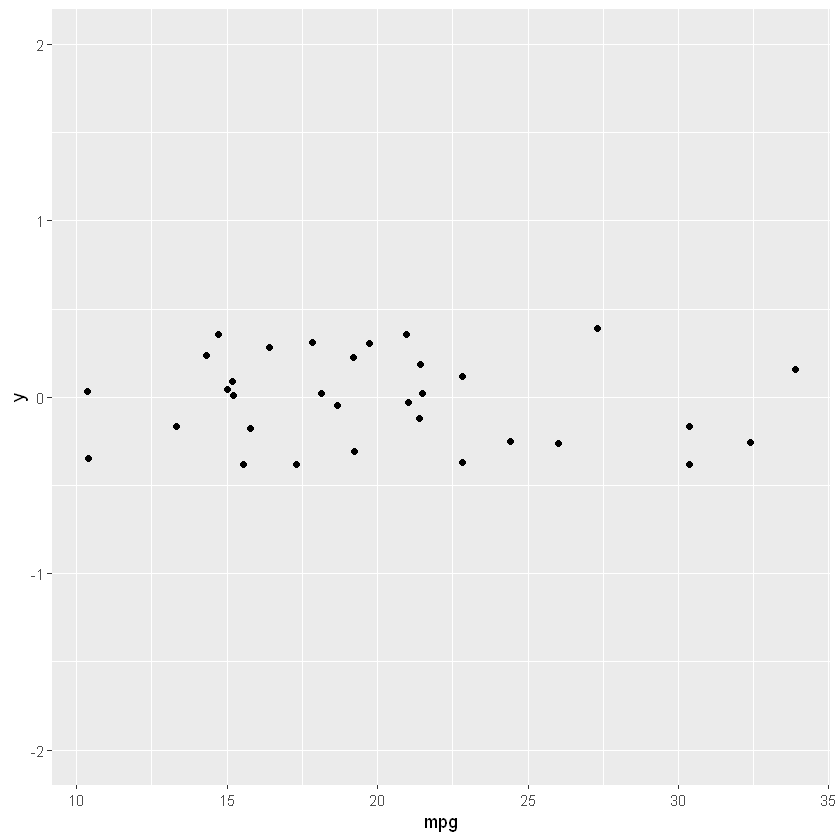

In [38]:
ggplot(mtcars, aes(mpg, 0)) +
  geom_jitter() +
  # Set the y-axis limits
  ylim(-2,2)